## 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ge-2024-results-csv/GE_2024_Results.csv


In [3]:
df = pd.read_csv('/kaggle/input/ge-2024-results-csv/GE_2024_Results.csv')
df

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...,...
8901,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,8904,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


In [4]:
print(df.shape)

(8906, 10)


In [5]:
print(df.head(20))

    ID                      State               Constituency  \
0    1  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
1    2  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
2    3  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
3    4  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
4    4  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
5    5  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
6    6  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
7    7  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
8    8  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
9    4  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
10   9  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
11  10  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
12  11  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
13  12  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
14  13  Andaman & Nicobar Islands  Andam

In [6]:
df = df.drop(columns=['ID'])
print(df.head())

                       State               Constituency           Candidate  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands     BISHNU PADA RAY   
1  Andaman & Nicobar Islands  Andaman & Nicobar Islands  KULDEEP RAI SHARMA   
2  Andaman & Nicobar Islands  Andaman & Nicobar Islands          MANOJ PAUL   
3  Andaman & Nicobar Islands  Andaman & Nicobar Islands           JOE BIDEN   
4  Andaman & Nicobar Islands  Andaman & Nicobar Islands          D AYYAPPAN   

                                 Party EVM Votes Postal Votes  Total Votes  \
0               Bharatiya Janata Party    102182          254     102436.0   
1             Indian National Congress     77829          211      78040.0   
2  Andaman Nicobar Democratic Congress      8236           18       8254.0   
3                             Congress       NaN          NaN          NaN   
4  Communist Party of India  (Marxist)      6009            8       6017.0   

  % of Votes Result  
0      50.58    Won  
1      38.54

In [7]:
df = df.dropna()
df=df.reset_index(drop=True)
print(df.head())

                       State               Constituency           Candidate  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands     BISHNU PADA RAY   
1  Andaman & Nicobar Islands  Andaman & Nicobar Islands  KULDEEP RAI SHARMA   
2  Andaman & Nicobar Islands  Andaman & Nicobar Islands          MANOJ PAUL   
3  Andaman & Nicobar Islands  Andaman & Nicobar Islands          D AYYAPPAN   
4  Andaman & Nicobar Islands  Andaman & Nicobar Islands     V.K. ABDUL AZIZ   

                                 Party EVM Votes Postal Votes  Total Votes  \
0               Bharatiya Janata Party    102182          254     102436.0   
1             Indian National Congress     77829          211      78040.0   
2  Andaman Nicobar Democratic Congress      8236           18       8254.0   
3  Communist Party of India  (Marxist)      6009            8       6017.0   
4                          Independent      2195            8       2203.0   

  % of Votes Result  
0      50.58    Won  
1      38.54

In [8]:
print(df.shape)

(8902, 9)


In [9]:
telangana = df.loc[df['State'] == 'Telangana']
Top5Candidates = telangana.sort_values(by='Total Votes', ascending=False).head(5)
print(Top5Candidates[["Candidate","Total Votes"]])

                       Candidate  Total Votes
7049             EATALA RAJENDER     991042.0
6853     KONDA VISHWESHWAR REDDY     809882.0
7137           KUNDURU RAGHUVEER     784337.0
6957  RAMASAHAYAM RAGHURAM REDDY     766929.0
6897            ASADUDDIN OWAISI     661981.0


In [10]:
Totalvotes = df.groupby('State')['Total Votes'].sum()
Totalvotes = Totalvotes.reset_index()
print(Totalvotes[["State","Total Votes"]])

                                   State  Total Votes
0              Andaman & Nicobar Islands     202514.0
1                         Andhra Pradesh   33729342.0
2                      Arunachal Pradesh     723247.0
3                                  Assam   20059870.0
4                                  Bihar   43448949.0
5                             Chandigarh     449275.0
6                           Chhattisgarh   15061348.0
7   Dadra & Nagar Haveli and Daman & Diu     297998.0
8                                    Goa     906538.0
9                                Gujarat   29115599.0
10                               Haryana   13055572.0
11                      Himachal Pradesh    4069906.0
12                     Jammu and Kashmir    5151193.0
13                             Jharkhand   17241982.0
14                             Karnataka   38793617.0
15                                Kerala   19980436.0
16                                Ladakh     135524.0
17                          

In [11]:
IdividualTotalVotes=df.groupby("State")["Total Votes"].sum()
TotalVotes=df["Total Votes"].sum()
PercentageVotes=(IdividualTotalVotes / TotalVotes)*100
print(PercentageVotes)


State
Andaman & Nicobar Islands                0.031380
Andhra Pradesh                           5.226410
Arunachal Pradesh                        0.112068
Assam                                    3.108306
Bihar                                    6.732478
Chandigarh                               0.069616
Chhattisgarh                             2.333778
Dadra & Nagar Haveli and Daman & Diu     0.046175
Goa                                      0.140469
Gujarat                                  4.511504
Haryana                                  2.022980
Himachal Pradesh                         0.630638
Jammu and Kashmir                        0.798185
Jharkhand                                2.671670
Karnataka                                6.011127
Kerala                                   3.095997
Ladakh                                   0.021000
Lakshadweep                              0.007624
Madhya Pradesh                           5.878897
Maharashtra                              8.8

In [12]:
ToatlPartyVotes = df.groupby('Party')['Total Votes'].sum()
Top5Parties = ToatlPartyVotes.sort_values(ascending=False).head(5)
print(Top5Parties)

Party
Bharatiya Janata Party          235973935.0
Indian National Congress        136759064.0
Samajwadi Party                  29549381.0
All India Trinamool Congress     28213393.0
Independent                      17844442.0
Name: Total Votes, dtype: float64


In [13]:
df.columns

Index(['State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

In [14]:
Lost=df[df['Result']=='Lost']
df["% of Votes"]=pd.to_numeric(df["% of Votes"])
SortedList=Lost.sort_values(by="% of Votes",ascending=False).head(10)
print(SortedList)

ValueError: Unable to parse string "-" at position 1737

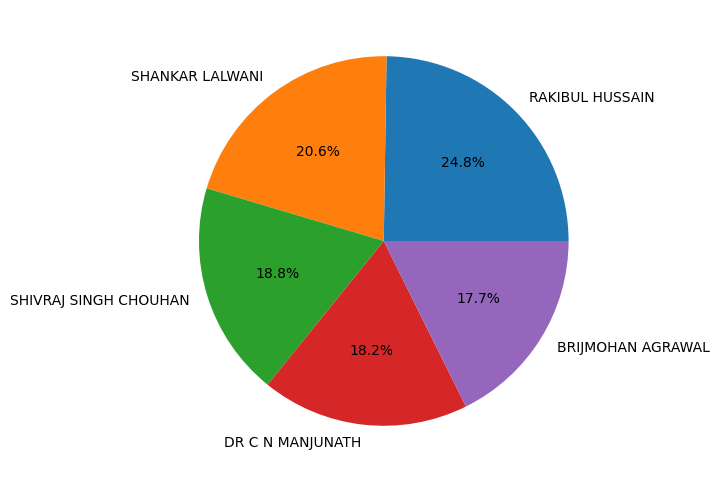

In [15]:
Top5Candidates= df.sort_values(by='Total Votes',ascending=False).head()
TotalVotes=Top5Candidates['Total Votes']
plt.figure(figsize=(6,6))
plt.pie(TotalVotes, labels=Top5Candidates["Candidate"], autopct='%0.1f%%')
plt.show()

TypeError: no numeric data to plot

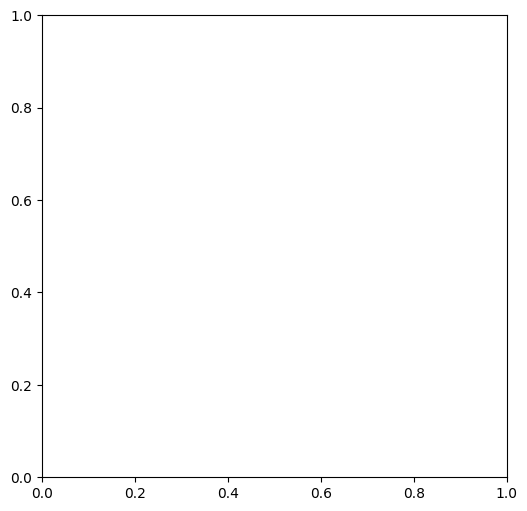

In [19]:
Karnataka=df[df['State']== 'Karnataka']
PostalVotes=Karnataka.groupby("Party")["Postal Votes"].sum()
plt.figure(figsize=(6,6))
PostalVotes.plot(kind="bar")
plt.show()
# print(PostalVotes)